🧠 LSTM MODEL TRAINING FOR PLAYER VALUATION

📂 Loading data...
✅ Loaded 10754 player records

🔧 Engineering temporal features...
✅ Engineered 7 new temporal features

🔄 Creating LSTM sequences...
📊 Clean dataset: 10587 samples
✅ Created 10582 sequences of length 5
   Input shape: (10582, 5, 19)
   Output shape: (10582,)

📏 Scaling features...
✅ Data normalized to [0, 1] range

📊 Data split:
   Training: 8465 sequences
   Testing: 2117 sequences

🏗️ Building LSTM architecture...
✅ LSTM Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 5, 128)         │        75,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 5, 128)         │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 5, 64)          │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 64)          │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142,593 (557.00 KB)

 Trainable params: 142,209 (555.50 KB)

 Non-trainable params: 384 (1.50 KB)


💪 Training LSTM model...
Epoch 1/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0038 - mae: 0.0363 - val_loss: 0.0036 - val_mae: 0.0231 - learning_rate: 0.0010
Epoch 2/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0024 - mae: 0.0249 - val_loss: 0.0035 - val_mae: 0.0277 - learning_rate: 0.0010
Epoch 3/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0024 - mae: 0.0244 - val_loss: 0.0035 - val_mae: 0.0270 - learning_rate: 0.0010
Epoch 4/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0024 - mae: 0.0244 - val_loss: 0.0035 - val_mae: 0.0250 - learning_rate: 0.0010
Epoch 5/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0024 - mae: 0.0242 - val_loss: 0.0035 - val_mae: 0.0287 - learning_rate: 0.0010
Epoch 6/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0024 - mae: 0.0243 - val_loss: 0.0035 - val_mae: 0.0278 - learning_rate: 0.0010
Epoch 7/100
265/265 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0024 - mae: 0.0244 - val_loss: 0.0035 - val_mae: 0.0


🎯 LSTM Model Performance:
   RMSE: € 10,574,680
   MAE:  € 4,545,266
   R²:   0.0160

💾 Saving LSTM model and scalers...
✅ Saved:
   - lstm_model.h5
   - lstm_scaler_X.joblib
   - lstm_scaler_y.joblib
   - lstm_metadata.joblib

📈 Generating training plots...
✅ Saved training history plot: lstm_training_history.png


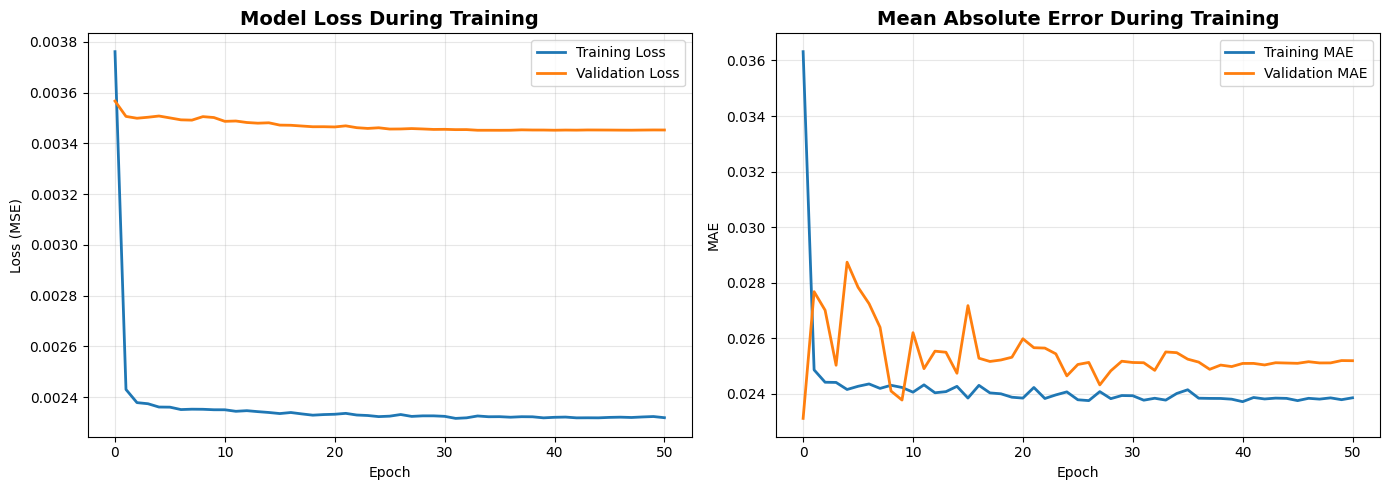

✅ Saved prediction plot: lstm_predictions.png


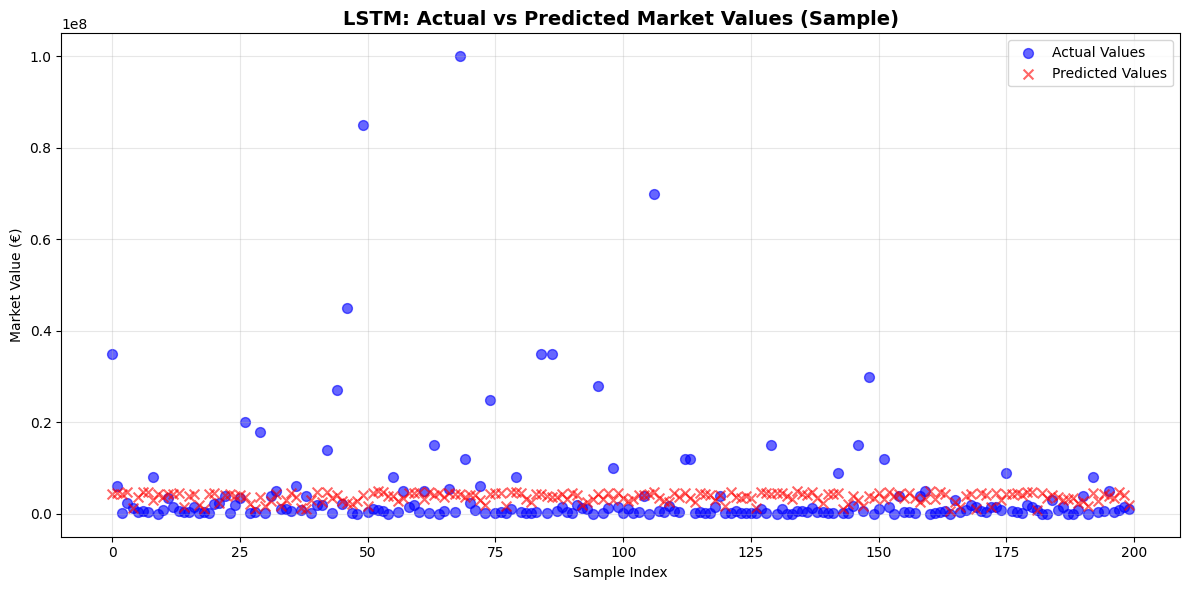


🎉 LSTM MODEL TRAINING COMPLETE!

Final Metrics:
  RMSE: € 10,574,680
  MAE:  € 4,545,266
  R²:   0.0160

Ready for ensemble modeling! 🚀


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

print("=" * 70)
print("🧠 LSTM MODEL TRAINING FOR PLAYER VALUATION")
print("=" * 70)

# --- 1. LOAD DATA ---
print("\n📂 Loading data...")
try:
    df = pd.read_csv('final_data.csv')
    df.columns = df.columns.str.strip().str.lower()
    print(f"✅ Loaded {len(df)} player records")
except FileNotFoundError:
    print("❌ 'final_data.csv' not found.")
    exit()

# --- 2. FEATURE ENGINEERING FOR TIME-SERIES ---
print("\n🔧 Engineering temporal features...")

# Create age-based groupings as pseudo time-steps
df['age_group'] = pd.cut(df['age'], bins=[15, 20, 23, 26, 29, 32, 45], 
                          labels=['U20', '20-23', '23-26', '26-29', '29-32', '32+'])

# Calculate per-game statistics (temporal proxies)
df['goals_per_game'] = df['goals'] / (df['appearance'] + 1)
df['assists_per_game'] = df['assists'] / (df['appearance'] + 1)
df['minutes_per_game'] = df['minutes played'] / (df['appearance'] + 1)
df['injury_rate'] = df['days_injured'] / (df['appearance'] + 1)

# Performance efficiency metrics
df['goal_contribution'] = df['goals'] + df['assists']
df['discipline_score'] = df['yellow cards'] + (df['red cards'] * 3)
df['availability_score'] = df['appearance'] / (df['appearance'] + df['games_injured'] + 1)

print("✅ Engineered 7 new temporal features")

# --- 3. PREPARE LSTM SEQUENCES ---
print("\n🔄 Creating LSTM sequences...")

features_lstm = [
    'age', 'height', 'appearance', 'goals', 'assists',
    'yellow cards', 'red cards', 'goals conceded', 'clean sheets',
    'minutes played', 'days_injured', 'games_injured',
    'goals_per_game', 'assists_per_game', 'minutes_per_game',
    'injury_rate', 'goal_contribution', 'discipline_score', 'availability_score'
]

target = 'current_value'

# Clean data
df_lstm = df[features_lstm + [target]].copy()
df_lstm = df_lstm.dropna()
df_lstm = df_lstm[df_lstm[target] > 0]

print(f"📊 Clean dataset: {len(df_lstm)} samples")

# Create sequences by grouping similar players (position + age bracket)
def create_sequences(data, features, target, sequence_length=5):
    """
    Create LSTM sequences by treating similar player stats as time steps.
    We'll use a sliding window approach over the sorted data.
    """
    X_sequences = []
    y_sequences = []
    
    # Sort by age to create pseudo-temporal ordering
    data_sorted = data.sort_values('age').reset_index(drop=True)
    
    # Extract feature matrix and target
    X = data_sorted[features].values
    y = data_sorted[target].values
    
    # Create sliding windows
    for i in range(len(X) - sequence_length):
        X_sequences.append(X[i:i + sequence_length])
        y_sequences.append(y[i + sequence_length])  # Predict next value
    
    return np.array(X_sequences), np.array(y_sequences)

SEQUENCE_LENGTH = 5  # Use 5 player records as one sequence
X_seq, y_seq = create_sequences(df_lstm, features_lstm, target, SEQUENCE_LENGTH)

print(f"✅ Created {len(X_seq)} sequences of length {SEQUENCE_LENGTH}")
print(f"   Input shape: {X_seq.shape}")
print(f"   Output shape: {y_seq.shape}")

# --- 4. SCALE DATA ---
print("\n📏 Scaling features...")

# Reshape for scaling
n_samples, n_steps, n_features = X_seq.shape
X_reshaped = X_seq.reshape(-1, n_features)

# Fit scaler
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X_reshaped)
X_scaled = X_scaled.reshape(n_samples, n_steps, n_features)

# Scale target
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y_seq.reshape(-1, 1)).flatten()

print("✅ Data normalized to [0, 1] range")

# --- 5. TRAIN-TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, random_state=42, shuffle=True
)

print(f"\n📊 Data split:")
print(f"   Training: {len(X_train)} sequences")
print(f"   Testing: {len(X_test)} sequences")

# --- 6. BUILD LSTM MODEL ---
print("\n🏗️ Building LSTM architecture...")

model = Sequential([
    # First LSTM layer with return sequences
    LSTM(128, return_sequences=True, input_shape=(SEQUENCE_LENGTH, n_features)),
    Dropout(0.3),
    BatchNormalization(),
    
    # Second LSTM layer
    LSTM(64, return_sequences=True),
    Dropout(0.3),
    BatchNormalization(),
    
    # Third LSTM layer
    LSTM(32, return_sequences=False),
    Dropout(0.2),
    
    # Dense layers
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

# Compile model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',
    metrics=['mae']
)

print("✅ LSTM Model Architecture:")
model.summary()

# --- 7. TRAIN MODEL ---
print("\n💪 Training LSTM model...")

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

# Train
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

print("\n✅ LSTM training complete!")

# --- 8. EVALUATE MODEL ---
print("\n📊 Evaluating LSTM performance...")

# Make predictions (scaled)
y_pred_scaled = model.predict(X_test, verbose=0).flatten()

# Inverse transform to original scale
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_pred_original = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Calculate metrics
rmse_lstm = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
mae_lstm = mean_absolute_error(y_test_original, y_pred_original)
r2_lstm = r2_score(y_test_original, y_pred_original)

print(f"\n🎯 LSTM Model Performance:")
print(f"   RMSE: € {rmse_lstm:,.0f}")
print(f"   MAE:  € {mae_lstm:,.0f}")
print(f"   R²:   {r2_lstm:.4f}")

# --- 9. SAVE MODEL & SCALERS ---
print("\n💾 Saving LSTM model and scalers...")

model.save('lstm_model.h5')
joblib.dump(scaler_X, 'lstm_scaler_X.joblib')
joblib.dump(scaler_y, 'lstm_scaler_y.joblib')

# Save metadata
metadata = {
    'sequence_length': SEQUENCE_LENGTH,
    'n_features': n_features,
    'features': features_lstm,
    'rmse': float(rmse_lstm),
    'mae': float(mae_lstm),
    'r2': float(r2_lstm)
}
joblib.dump(metadata, 'lstm_metadata.joblib')

print("✅ Saved:")
print("   - lstm_model.h5")
print("   - lstm_scaler_X.joblib")
print("   - lstm_scaler_y.joblib")
print("   - lstm_metadata.joblib")

# --- 10. PLOT TRAINING HISTORY ---
print("\n📈 Generating training plots...")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss plot
axes[0].plot(history.history['loss'], label='Training Loss', linewidth=2)
axes[0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
axes[0].set_title('Model Loss During Training', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# MAE plot
axes[1].plot(history.history['mae'], label='Training MAE', linewidth=2)
axes[1].plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
axes[1].set_title('Mean Absolute Error During Training', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('MAE')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lstm_training_history.png', dpi=300, bbox_inches='tight')
print("✅ Saved training history plot: lstm_training_history.png")
plt.show()

# --- 11. PREDICTION COMPARISON PLOT ---
fig, ax = plt.subplots(figsize=(12, 6))

# Sample predictions for visualization
sample_size = min(200, len(y_test_original))
indices = np.random.choice(len(y_test_original), sample_size, replace=False)
sample_indices = np.arange(sample_size)

ax.scatter(sample_indices, y_test_original[indices], 
           alpha=0.6, s=50, label='Actual Values', color='blue')
ax.scatter(sample_indices, y_pred_original[indices], 
           alpha=0.6, s=50, label='Predicted Values', color='red', marker='x')

ax.set_title('LSTM: Actual vs Predicted Market Values (Sample)', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('Sample Index')
ax.set_ylabel('Market Value (€)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('lstm_predictions.png', dpi=300, bbox_inches='tight')
print("✅ Saved prediction plot: lstm_predictions.png")
plt.show()

print("\n" + "=" * 70)
print("🎉 LSTM MODEL TRAINING COMPLETE!")
print("=" * 70)
print(f"\nFinal Metrics:")
print(f"  RMSE: € {rmse_lstm:,.0f}")
print(f"  MAE:  € {mae_lstm:,.0f}")
print(f"  R²:   {r2_lstm:.4f}")
print(f"\nReady for ensemble modeling! 🚀")